# LIBRARIES

In [1]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import numpy as np
import warnings
from collections import Counter
from wordcloud import WordCloud
import os
from joblib import dump, load

warnings.filterwarnings("ignore")
stemmer = PorterStemmer()
def stem_words(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])

try:
    df = pd.read_csv('/kaggle/input/dataset-01/reviews.csv', encoding='utf-8')
except UnicodeDecodeError:
    try:
        df = pd.read_csv('/kaggle/input/dataset-01/reviews.csv', encoding='latin-1')
    except UnicodeDecodeError:
        df = pd.read_csv('/kaggle/input/dataset-01/reviews.csv', encoding='ISO-8859-1')

# EXPLORATORY DATA ANALYSIS

In [2]:
df.head()

,review,feedback
0,father of the bride ii follows the 1991 father...,0
1,rounders reviewed by jamie peckrating : miram...,1
2,"wilde ( uk , 1997 ) 1/3 directed by brian gilb...",1
3,picture : the picture on this dvd in incredibl...,1
4,directed by michael bay . screenplay by randal...,0


In [3]:
df.shape

(1400, 2)

In [4]:
print(df['feedback'].value_counts())

feedback
0    700
1    700
Name: count, dtype: int64


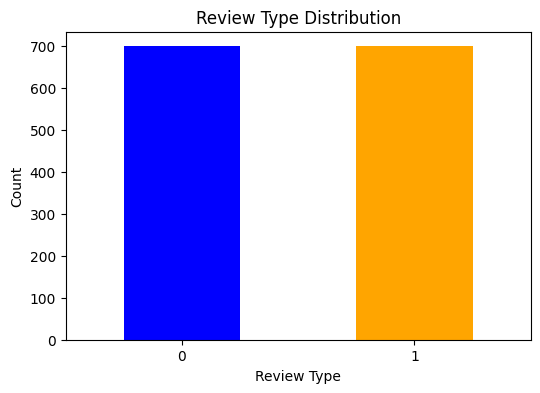

In [5]:
plt.figure(figsize=(6, 4))
df['feedback'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Review Type Distribution')
plt.xlabel('Review Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [6]:
df['review_length'] = df['review'].apply(lambda x: len(str(x).split()))
print("\nSummary statistics of comment length:")
print(df['review_length'].describe())


Summary statistics of comment length:
count    1400.000000
mean      751.237143
std       329.777889
min        45.000000
25%       529.500000
50%       697.000000
75%       922.500000
max      2194.000000
Name: review_length, dtype: float64


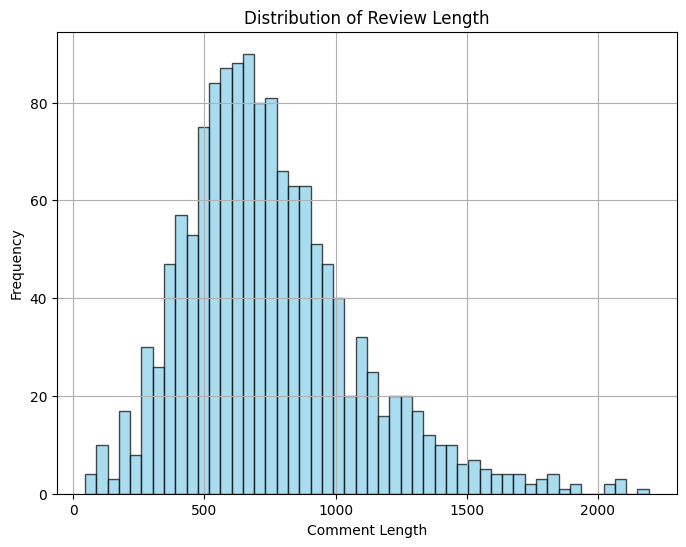

In [7]:
plt.figure(figsize=(8, 6))
plt.hist(df['review_length'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Review Length')
plt.xlabel('Comment Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [8]:
all_comments = ' '.join(df['review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments)

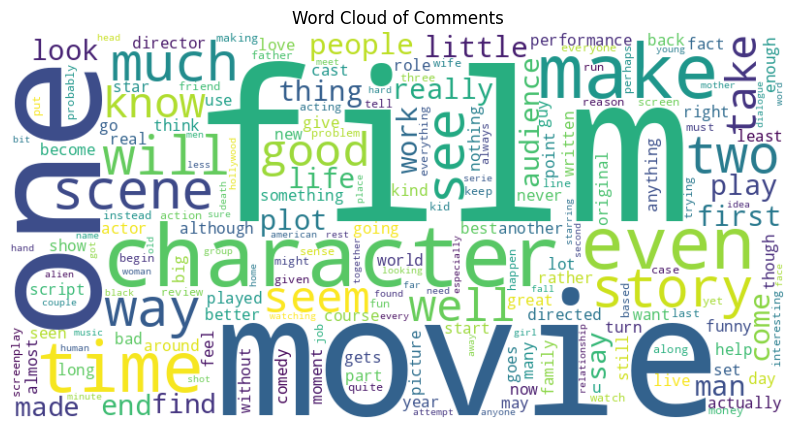

In [9]:
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Comments')
plt.axis('off')
plt.show()

# LOGISTIC REGRESSION

In [47]:
from sklearn.linear_model import LogisticRegression, Ridge

X = df['review']
y = df['feedback']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y,random_state=42)

tf_idf = TfidfVectorizer(sublinear_tf=True,  ngram_range=(1, 3)) # 0.8607

X_train_tfidf = tf_idf.fit_transform(X_train)
X_test_tfidf = tf_idf.transform(X_test)

lgmodel = LogisticRegression(solver='saga',max_iter=1000)
lgmodel.fit(X_train_tfidf, y_train)

y_pred = lgmodel.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8625


In [11]:
input_dir = '/kaggle/working/'

model_dir = os.path.join(input_dir, 'models')
os.makedirs(model_dir, exist_ok=True)

# Save the model to the input directory
model_path = os.path.join(model_dir, 'lr_model.joblib')
dump(lgmodel, model_path)

['/kaggle/working/models/lr_model.joblib']

In [12]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.82      0.86       280
           1       0.84      0.90      0.87       280

    accuracy                           0.86       560
   macro avg       0.86      0.86      0.86       560
weighted avg       0.86      0.86      0.86       560

Confusion Matrix:
[[231  49]
 [ 28 252]]


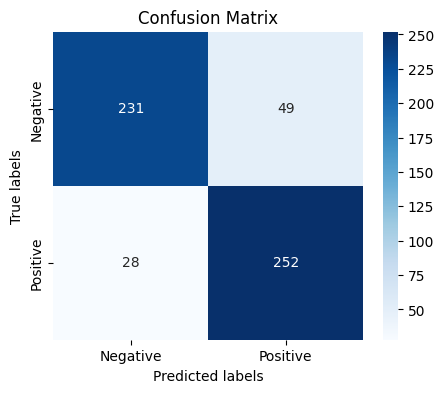

In [13]:
plt.figure(figsize=(5, 4))
sn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [14]:
solvers = ['saga', 'lbfgs',  'newton-cg', 'sag', 'liblinear']

for solver in solvers:
    print(f"Using solver: {solver}")

    model = LogisticRegression(solver=solver)
    model.fit(X_train_tfidf, y_train)

    y_pred = model.predict(X_test_tfidf)

    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    
    train_score = model.score(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    test_score = model.score(X_test_tfidf, y_test)
    
    print(f"Training R^2 score: {train_score:.3f}")
    print(f"Testing R^2 score: {test_score:.3f}")
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("-" * 30)

Using solver: saga
Accuracy: 0.8625
Training R^2 score: 1.000
Testing R^2 score: 0.863
Accuracy: 0.8625
------------------------------
Using solver: lbfgs
Accuracy: 0.8625
Training R^2 score: 1.000
Testing R^2 score: 0.863
Accuracy: 0.8625
------------------------------
Using solver: newton-cg
Accuracy: 0.8625
Training R^2 score: 1.000
Testing R^2 score: 0.863
Accuracy: 0.8625
------------------------------
Using solver: sag
Accuracy: 0.8625
Training R^2 score: 1.000
Testing R^2 score: 0.863
Accuracy: 0.8625
------------------------------
Using solver: liblinear
Accuracy: 0.8625
Training R^2 score: 1.000
Testing R^2 score: 0.863
Accuracy: 0.8625
------------------------------


# SVM-rbf

In [51]:
from sklearn.svm import SVC

X = df['review']
y = df['feedback']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)

svm_tf_idf = TfidfVectorizer(sublinear_tf=True,  ngram_range=(1, 2)) # 0.8571
# tf_idf = TfidfVectorizer(sublinear_tf=True,  ngram_range=(1, 3)) # 0.0.7642
# tf_idf = TfidfVectorizer(sublinear_tf=True, analyzer='word', stop_words='english',ngram_range=(1, 2)) # 0.8125

X_train_tfidf = svm_tf_idf.fit_transform(X_train)
X_test_tfidf = svm_tf_idf.transform(X_test)

svcmodel = SVC(kernel='rbf')
svcmodel.fit(X_train_tfidf, y_train)

y_pred = svcmodel.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8571428571428571


In [16]:
input_dir = '/kaggle/working/'

model_dir = os.path.join(input_dir, 'models')
os.makedirs(model_dir, exist_ok=True)

# Save the model to the input directory
model_path = os.path.join(model_dir, 'svc_model.joblib')
dump(svcmodel, model_path)

['/kaggle/working/models/svc_model.joblib']

In [17]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       280
           1       0.84      0.89      0.86       280

    accuracy                           0.86       560
   macro avg       0.86      0.86      0.86       560
weighted avg       0.86      0.86      0.86       560

Confusion Matrix:
[[231  49]
 [ 31 249]]


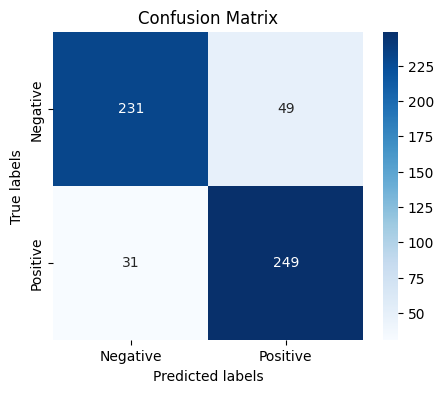

In [18]:
plt.figure(figsize=(5, 4))
sn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# SVM-linear

In [52]:
from sklearn.svm import SVC

X = df['review']
y = df['feedback']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)

svm_linear_tf_idf = TfidfVectorizer(sublinear_tf=True,  ngram_range=(1, 2)) #0.8714
# tf_idf = TfidfVectorizer(sublinear_tf=True,  ngram_range=(1, 3)) #0.8696
# tf_idf = TfidfVectorizer(sublinear_tf=True, analyzer='word', stop_words='english',ngram_range=(1, 2)) # 0.8482

X_train_tfidf = svm_linear_tf_idf.fit_transform(X_train)
X_test_tfidf = svm_linear_tf_idf.transform(X_test)

svc_linear_model = SVC(kernel='linear')
svc_linear_model.fit(X_train_tfidf, y_train)

y_pred = svc_linear_model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8714285714285714


In [20]:
input_dir = '/kaggle/working/'

model_dir = os.path.join(input_dir, 'models')
os.makedirs(model_dir, exist_ok=True)

# Save the model to the input directory
model_path = os.path.join(model_dir, 'svc_linear_model.joblib')
dump(svc_linear_model, model_path)

['/kaggle/working/models/svc_linear_model.joblib']

In [21]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       280
           1       0.86      0.89      0.87       280

    accuracy                           0.87       560
   macro avg       0.87      0.87      0.87       560
weighted avg       0.87      0.87      0.87       560

Confusion Matrix:
[[238  42]
 [ 30 250]]


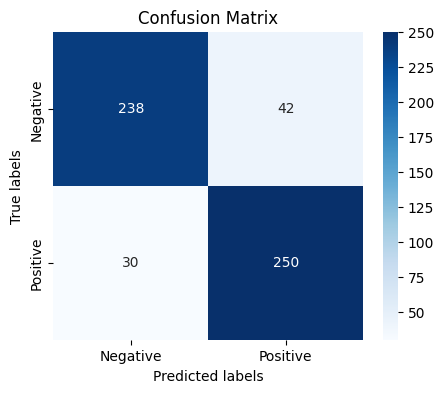

In [22]:
plt.figure(figsize=(5, 4))
sn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# KNN (n=3)

In [53]:
from sklearn.neighbors import KNeighborsClassifier

X = df['review']
y = df['feedback']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)

# tf_idf = TfidfVectorizer(analyzer=stem_words, stop_words=stopwords.words('english'), 
#                              sublinear_tf=True, max_df=0.9, min_df=0.1, ngram_range=(1, 2),
#                              norm='l2', smooth_idf=True, use_idf=True)

# tf_idf = TfidfVectorizer(sublinear_tf=True,  ngram_range=(1, 2)) #0.716
knn_tf_idf = TfidfVectorizer(sublinear_tf=True, analyzer='word', stop_words='english',ngram_range=(1, 2))


X_train_tfidf = knn_tf_idf.fit_transform(X_train)
X_test_tfidf = knn_tf_idf.transform(X_test)

knnmodel = KNeighborsClassifier(n_neighbors=5)
knnmodel.fit(X_train_tfidf, y_train)


y_pred = knnmodel.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7142857142857143


In [24]:
input_dir = '/kaggle/working/'

model_dir = os.path.join(input_dir, 'models')
os.makedirs(model_dir, exist_ok=True)

# Save the model to the input directory
model_path = os.path.join(model_dir, 'knn_model.joblib')
dump(knnmodel, model_path)

['/kaggle/working/models/knn_model.joblib']

In [25]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.66      0.70       280
           1       0.69      0.77      0.73       280

    accuracy                           0.71       560
   macro avg       0.72      0.71      0.71       560
weighted avg       0.72      0.71      0.71       560

Confusion Matrix:
[[185  95]
 [ 65 215]]


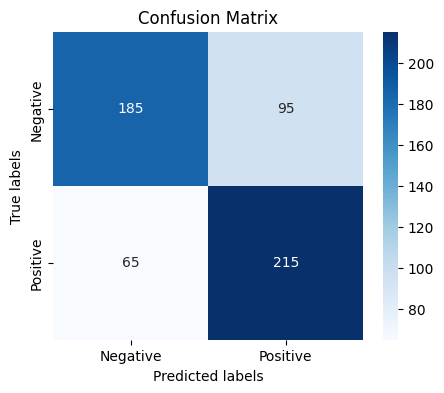

In [26]:
plt.figure(figsize=(5, 4))
sn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# DECISION TREE

In [54]:
from sklearn.tree import DecisionTreeClassifier

X = df['review']
y = df['feedback']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)


# tf_idf = TfidfVectorizer(sublinear_tf=True,analyzer='word', stop_words='english',ngram_range=(1, 2)) # 0.5946
dt_tf_idf = TfidfVectorizer(sublinear_tf=True,analyzer='word', stop_words='english') # 0.63


X_train_tfidf = dt_tf_idf.fit_transform(X_train)
X_test_tfidf = dt_tf_idf.transform(X_test)


dtmodel = DecisionTreeClassifier()
dtmodel.fit(X_train_tfidf, y_train)

y_pred = dtmodel.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6160714285714286


In [28]:
input_dir = '/kaggle/working/'

model_dir = os.path.join(input_dir, 'models')
os.makedirs(model_dir, exist_ok=True)

# Save the model to the input directory
model_path = os.path.join(model_dir, 'dt_model.joblib')
dump(dtmodel, model_path)

['/kaggle/working/models/dt_model.joblib']

In [29]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.61      0.61       280
           1       0.61      0.60      0.60       280

    accuracy                           0.61       560
   macro avg       0.61      0.61      0.61       560
weighted avg       0.61      0.61      0.61       560

Confusion Matrix:
[[171 109]
 [112 168]]


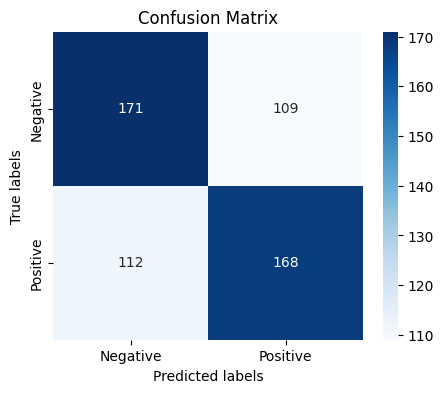

In [30]:
plt.figure(figsize=(5, 4))
sn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


# RANDOM FOREST CLASSIFIER

In [55]:
from sklearn.ensemble import RandomForestClassifier

X = df['review']
y = df['feedback']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)

# tf_idf = TfidfVectorizer(analyzer=stem_words, stop_words=stopwords.words('english'), 
#                              sublinear_tf=True, max_df=0.9, min_df=0.1, ngram_range=(1, 2),
#                              norm='l2', smooth_idf=True, use_idf=True)

# tf_idf = TfidfVectorizer(sublinear_tf=True,  ngram_range=(1, 2)) # 0.725
rf_tf_idf = TfidfVectorizer(sublinear_tf=True,analyzer='word', stop_words='english',ngram_range=(1, 2)) # .807


X_train_tfidf = rf_tf_idf.fit_transform(X_train)
X_test_tfidf = rf_tf_idf.transform(X_test)

rfmodel = RandomForestClassifier()
rfmodel.fit(X_train_tfidf, y_train)


y_pred = rfmodel.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7357142857142858


In [32]:
input_dir = '/kaggle/working/'

model_dir = os.path.join(input_dir, 'models')
os.makedirs(model_dir, exist_ok=True)

# Save the model to the input directory
model_path = os.path.join(model_dir, 'rf_model.joblib')
dump(rfmodel, model_path)

['/kaggle/working/models/rf_model.joblib']

In [33]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.88      0.77       280
           1       0.83      0.59      0.69       280

    accuracy                           0.74       560
   macro avg       0.76      0.74      0.73       560
weighted avg       0.76      0.74      0.73       560

Confusion Matrix:
[[247  33]
 [114 166]]


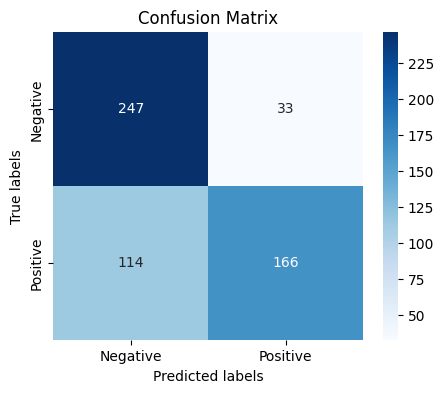

In [34]:
plt.figure(figsize=(5, 4))
sn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# BERNOULLI-NB

In [56]:
from sklearn.naive_bayes import BernoulliNB

X = df['review']
y = df['feedback']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)


bnb_tf_idf = TfidfVectorizer(sublinear_tf=True,  ngram_range=(1, 2)) # 0.7160
# tf_idf = TfidfVectorizer(sublinear_tf=True, analyzer='word', stop_words='english',ngram_range=(1, 3)) #


X_train_tfidf = bnb_tf_idf.fit_transform(X_train)
X_test_tfidf = bnb_tf_idf.transform(X_test)

bnbmodel = BernoulliNB()
bnbmodel.fit(X_train_tfidf, y_train)

y_pred = bnbmodel.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7160714285714286


In [36]:
input_dir = '/kaggle/working/'

model_dir = os.path.join(input_dir, 'models')
os.makedirs(model_dir, exist_ok=True)

# Save the model to the input directory
model_path = os.path.join(model_dir, 'bnb_model.joblib')
dump(bnbmodel, model_path)

['/kaggle/working/models/bnb_model.joblib']

In [37]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.98      0.78       280
           1       0.96      0.45      0.61       280

    accuracy                           0.72       560
   macro avg       0.80      0.72      0.69       560
weighted avg       0.80      0.72      0.69       560

Confusion Matrix:
[[275   5]
 [154 126]]


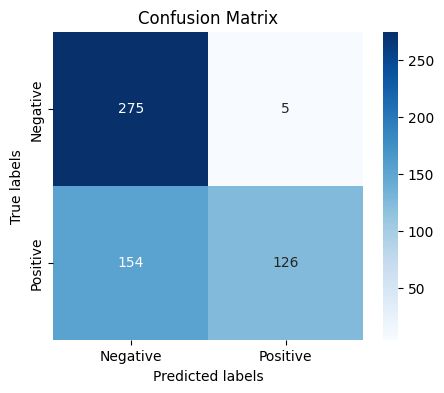

In [38]:
plt.figure(figsize=(5, 4))
sn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# GUASSIAN-NB

In [57]:
from sklearn.naive_bayes import GaussianNB

X = df['review']
y = df['feedback']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)


# tf_idf = TfidfVectorizer(analyzer=stem_words, stop_words=stopwords.words('english'), 
#                              sublinear_tf=True, max_df=0.9, min_df=0.1, ngram_range=(1, 2),
#                              norm='l2', smooth_idf=True, use_idf=True)

gnb_tf_idf = TfidfVectorizer(sublinear_tf=True,  ngram_range=(1, 2)) # 0.75
# tf_idf = TfidfVectorizer(sublinear_tf=True, analyzer='word', stop_words='english',ngram_range=(1, 2)) # 0.7178

X_train_tfidf = gnb_tf_idf.fit_transform(X_train)
X_test_tfidf = gnb_tf_idf.transform(X_test)

gnbmodel = GaussianNB()
gnbmodel.fit(X_train_tfidf.toarray(), y_train)

y_pred = gnbmodel.predict(X_test_tfidf.toarray())

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.75


In [40]:
input_dir = '/kaggle/working/'

model_dir = os.path.join(input_dir, 'models')
os.makedirs(model_dir, exist_ok=True)

# Save the model to the input directory
model_path = os.path.join(model_dir, 'gnb_model.joblib')
dump(gnbmodel, model_path)

['/kaggle/working/models/gnb_model.joblib']

In [41]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.66      0.72       280
           1       0.71      0.84      0.77       280

    accuracy                           0.75       560
   macro avg       0.76      0.75      0.75       560
weighted avg       0.76      0.75      0.75       560

Confusion Matrix:
[[184  96]
 [ 44 236]]


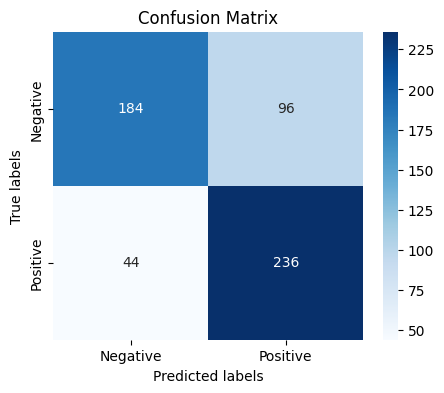

In [42]:
plt.figure(figsize=(5, 4))
sn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [44]:
knn_model = load('/kaggle/working/models/knn_model.joblib')
svc_linear_model = load('/kaggle/working/models/svc_linear_model.joblib')
svc_model = load('/kaggle/working/models/svc_model.joblib')
gnb_model = load('/kaggle/working/models/gnb_model.joblib')
lr_model = load('/kaggle/working/models/lr_model.joblib')
rf_model = load('/kaggle/working/models/rf_model.joblib')
bnb_model = load('/kaggle/working/models/bnb_model.joblib')
dt_model = load('/kaggle/working/models/dt_model.joblib')

In [72]:
query_comment = input("Enter your comment to predict its class: ")

print("Choose the algorithm for prediction: ")
print("1. K Nearest Neighbours")
print("2. SVC Linear")
print("3. SVC Rbf")
print("4. Gaussain Naive Bayes")
print("5. Linear Regression")
print("6. Random Forest")
print("7. Bernoulli Naive Bayes")
print("8. Decision Tree")

prediction = -1
option = int(input())

if option == 1:
    token = knn_tf_idf.transform([query_comment])
    prediction = knnmodel.predict(token)
elif option == 2:
    token = svm_linear_tf_idf.transform([query_comment])
    prediction = svc_linear_model.predict(token)
elif option == 3:
    token = svm_tf_idf.transform([query_comment])
    prediction = svcmodel.predict(token)
elif option == 4:
    token = gnb_tf_idf.transform([query_comment])
    prediction = gnbmodel.predict(token.toarray())
elif option == 5:
    token = tf_idf.transform([query_comment])
    prediction = lgmodel.predict(token)
elif option == 6:
    token = rf_tf_idf.transform([query_comment])
    prediction = rfmodel.predict(token)
elif option == 7:
    token = bnb_tf_idf.transform([query_comment])
    prediction = bnbmodel.predict(token)
elif option == 8:
    token = dt_tf_idf.transform([query_comment])
    prediction = dtmodel.predict(token)
else:
    print("Enter correct option!")
    
if prediction == 1:
    print("Positive")
else:
    print("Negative")

Enter your comment to predict its class:  nice action and romatic movie


Choose the algorithm for prediction: 
1. K Nearest Neighbours
2. SVC Linear
3. SVC Rbf
4. Gaussain Naive Bayes
5. Linear Regression
6. Random Forest
7. Bernoulli Naive Bayes
8. Decision Tree


 4


Negative
